In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/traulosspyros/Desktop/Big Blue Data Academy/nlp-challenge-team-a/Modelling/df_model.csv')

In [3]:
df.head()

,Unnamed: 0,review_id,title,year,user_review,user_suggestion,user_review_cleaned
0,0,1,Spooky's Jump Scare Mansion,2016.0,im scared hearing creepy voices ill pause mome...,1,"['im', 'scared', 'hearing', 'creepy', 'voice',..."
1,1,2,Spooky's Jump Scare Mansion,2016.0,best game better sam peppers youtube account y...,1,"['best', 'game', 'better', 'sam', 'pepper', 'y..."
2,2,3,Spooky's Jump Scare Mansion,2016.0,littly iffy controls know play easy master ive...,1,"['littly', 'iffy', 'control', 'know', 'play', ..."
3,3,4,Spooky's Jump Scare Mansion,2015.0,great game fun colorful thata side note though...,1,"['great', 'game', 'fun', 'colorful', 'thata', ..."
4,4,5,Spooky's Jump Scare Mansion,2015.0,many games cute tag right next horror tag stea...,1,"['many', 'game', 'cute', 'tag', 'right', 'next..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17494 non-null  int64  
 1   review_id            17494 non-null  int64  
 2   title                17494 non-null  object 
 3   year                 17316 non-null  float64
 4   user_review          17468 non-null  object 
 5   user_suggestion      17494 non-null  int64  
 6   user_review_cleaned  17494 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 956.8+ KB


In [5]:
df['user_review_cleaned'] = df['user_review_cleaned'].apply(eval)

In [6]:
df.head()

,Unnamed: 0,review_id,title,year,user_review,user_suggestion,user_review_cleaned
0,0,1,Spooky's Jump Scare Mansion,2016.0,im scared hearing creepy voices ill pause mome...,1,"[im, scared, hearing, creepy, voice, ill, paus..."
1,1,2,Spooky's Jump Scare Mansion,2016.0,best game better sam peppers youtube account y...,1,"[best, game, better, sam, pepper, youtube, acc..."
2,2,3,Spooky's Jump Scare Mansion,2016.0,littly iffy controls know play easy master ive...,1,"[littly, iffy, control, know, play, easy, mast..."
3,3,4,Spooky's Jump Scare Mansion,2015.0,great game fun colorful thata side note though...,1,"[great, game, fun, colorful, thata, side, note..."
4,4,5,Spooky's Jump Scare Mansion,2015.0,many games cute tag right next horror tag stea...,1,"[many, game, cute, tag, right, next, horror, t..."


In [7]:
type(df['user_review_cleaned'][0])

list

In [8]:
#First we need to untokenize, as the algorithms for tfidf do not accept tokens
def untokenize(txt):
    return '\n'.join(''.join(i) for i in txt)

df['review'] = df['user_review_cleaned'].apply(untokenize)

In [9]:
df.head()

,Unnamed: 0,review_id,title,year,user_review,user_suggestion,user_review_cleaned,review
0,0,1,Spooky's Jump Scare Mansion,2016.0,im scared hearing creepy voices ill pause mome...,1,"[im, scared, hearing, creepy, voice, ill, paus...",im\nscared\nhearing\ncreepy\nvoice\nill\npause...
1,1,2,Spooky's Jump Scare Mansion,2016.0,best game better sam peppers youtube account y...,1,"[best, game, better, sam, pepper, youtube, acc...",best\ngame\nbetter\nsam\npepper\nyoutube\nacco...
2,2,3,Spooky's Jump Scare Mansion,2016.0,littly iffy controls know play easy master ive...,1,"[littly, iffy, control, know, play, easy, mast...",littly\niffy\ncontrol\nknow\nplay\neasy\nmaste...
3,3,4,Spooky's Jump Scare Mansion,2015.0,great game fun colorful thata side note though...,1,"[great, game, fun, colorful, thata, side, note...",great\ngame\nfun\ncolorful\nthata\nside\nnote\...
4,4,5,Spooky's Jump Scare Mansion,2015.0,many games cute tag right next horror tag stea...,1,"[many, game, cute, tag, right, next, horror, t...",many\ngame\ncute\ntag\nright\nnext\nhorror\nta...


In [10]:
df['review'] = df['review'].replace('\n',' ', regex = True)  

In [11]:
df.head()

,Unnamed: 0,review_id,title,year,user_review,user_suggestion,user_review_cleaned,review
0,0,1,Spooky's Jump Scare Mansion,2016.0,im scared hearing creepy voices ill pause mome...,1,"[im, scared, hearing, creepy, voice, ill, paus...",im scared hearing creepy voice ill pause momen...
1,1,2,Spooky's Jump Scare Mansion,2016.0,best game better sam peppers youtube account y...,1,"[best, game, better, sam, pepper, youtube, acc...",best game better sam pepper youtube account yo...
2,2,3,Spooky's Jump Scare Mansion,2016.0,littly iffy controls know play easy master ive...,1,"[littly, iffy, control, know, play, easy, mast...",littly iffy control know play easy master ive ...
3,3,4,Spooky's Jump Scare Mansion,2015.0,great game fun colorful thata side note though...,1,"[great, game, fun, colorful, thata, side, note...",great game fun colorful thata side note though...
4,4,5,Spooky's Jump Scare Mansion,2015.0,many games cute tag right next horror tag stea...,1,"[many, game, cute, tag, right, next, horror, t...",many game cute tag right next horror tag steam...


In [12]:
df.columns

Index(['Unnamed: 0', 'review_id', 'title', 'year', 'user_review',
       'user_suggestion', 'user_review_cleaned', 'review'],
      dtype='object')

In [13]:
data = df.drop(columns = ['Unnamed: 0','review_id', 'title', 'year', 'user_review','user_review_cleaned'])

In [14]:
data.head()

,user_suggestion,review
0,1,im scared hearing creepy voice ill pause momen...
1,1,best game better sam pepper youtube account yo...
2,1,littly iffy control know play easy master ive ...
3,1,great game fun colorful thata side note though...
4,1,many game cute tag right next horror tag steam...


In [15]:
values = data['user_suggestion'].value_counts()

In [16]:
values

1    9968
0    7526
Name: user_suggestion, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_suggestion', ylabel='count'>

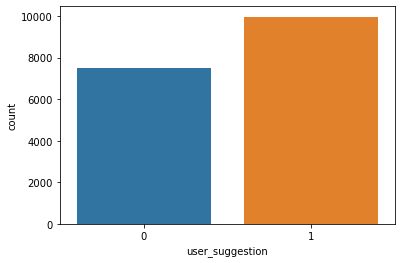

In [17]:
import seaborn as sns
sns.countplot(data["user_suggestion"])


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import swifter 
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['review'][:8000]) #we only get 8000 cause it takes too long to run the script
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_final= pd.DataFrame(denselist, columns=feature_names)

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 45033 entries, aa to zwischendurch
dtypes: float64(45033)
memory usage: 2.7 GB


In [21]:
X = df_final
y = data['user_suggestion'][:8000]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

## Traditional ML

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,accuracy_score


estimators = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]
scores = {'name':[], 'score':[]}

for estimator in estimators:
    pipe = Pipeline([('classifier',estimator)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    
    scores['name'].append(str(estimator))
    scores['score'].append(f1_score(y_test, preds))
    

In [24]:
score = pd.DataFrame(scores)

In [25]:
score

,name,score
0,LogisticRegression(),0.878937
1,RandomForestClassifier(),0.855127
2,KNeighborsClassifier(),0.749603


In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

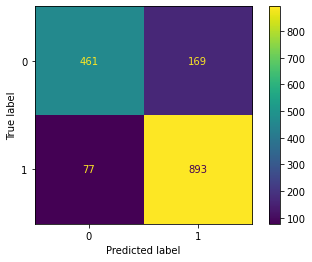

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)


### Our simple logistic regression model with only half of the data, predicts quite good the recommendation

## 1) LSTM - We will attempt an LSTM as well

In [32]:
#We will keep 100 features for training the dataset
max_features = 100

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = train['review'])

X = tokenizer.texts_to_matrix(texts = train['review'], mode='tfidf')

In [36]:
X.shape

(13995, 64026)

In [37]:
y = to_categorical(train['user_suggestion'])

In [38]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [39]:
y.shape

(13995, 2)

In [40]:
# splitting the data training data for training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [41]:
X_train.shape[0]

12595

In [42]:
y_train.shape

(12595, 2)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, GRU

In [44]:
from tensorflow.keras import backend as K 
K.clear_session()

In [45]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim =X.shape[0] , output_dim = 256))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))
model_lstm.add(Dense(64, activation = 'relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(2, activation = 'softmax'))
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 3,
    batch_size = 512
)

Epoch 1/3


In [ ]:
model_lstm.summary()

In [ ]:
test_data = pd.read_csv('/Users/traulosspyros/Desktop/Big Blue Data Academy/NLP project csvs/test_gr/test.csv')

In [ ]:
test_data.head()

In [ ]:
tokenizer.fit_on_texts(texts = test_data['user_review'])
test_text = tokenizer.texts_to_matrix(texts = test_data['user_review'], mode='tfidf')

In [ ]:
lstm_prediction = model_lstm.predict_classes(test_text)

In [ ]:
lstm_prediction

In [ ]:
output = pd.DataFrame({'id':test_data['review_id'], 'review':test_data['user_review'],'outcome':lstm_prediction})
output.shape

In [ ]:
output.head()

In [ ]:
output['outcome'].value_counts()